<h1 style="text-align: center; line-height: 1.5;">
Machine Learning Models for Parkinson’s Disease Detection Using Pre-Extracted Voice Features
</h1>

<h2 style="color: navy;">I. Data Preprocessing</h2>

Before training the models, we perform several preprocessing steps to ensure the data is clean and ready for machine learning:

<h3>1. Import Data</h3>

We load the Parkinson’s dataset into a pandas DataFrame for exploration and manipulation.

In [104]:
import pandas as pd
df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<h3>2. Data Cleaning</h3>

Before training our models, we perform data cleaning to ensure the dataset is consistent and free of irrelevant information:

<h4 style="color: #333333; text-indent: 10px;"><u>2.1 Remove the ‘name’ column</u></h4>

In [109]:
df = df.drop(columns=['name'])

<h4 style="color: #333333; text-indent: 10px;"><u>2.2 Check for missing values</u></h4>

We verify that there are no NaN (missing) values in the dataset to avoid errors during training.

In [112]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

All columns have **0 missing values**, so the dataset is complete and ready for model training.

<h4 style="color: #333333; text-indent: 10px;"><u>2.3 Verify Duplicates</u></h4>

We identify and remove duplicate rows to avoid bias in model training.

In [117]:
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


There are **0 duplicated rows**, so the dataset contains only unique entries.

<h4 style="color: #333333; text-indent: 10px;"><u>2.4 Target Variable Distribution</u></h4>

We examine the distribution of the target variable (status) to check for class imbalance.

In [120]:
print(df['status'].value_counts())

status
1    147
0     48
Name: count, dtype: int64


The dataset is **imbalanced**, with 147 positive cases (1) and 48 negative cases (0), so we will try to **balance it**.

<h3>3. Balancing and Scaling the Data</h3>

Before training the models, we need to split, normalize, and balance the dataset.

<h4 style="color: #333333; text-indent: 10px;"><u>3.1 Train/Test Split</u></h4>

We split the data into training and testing sets.
This is important because we want to apply SMOTE only on the training data to avoid any information leakage.
We use stratify=y to keep the same class distribution as in the original dataset in both sets.

In [127]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['status'])
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


<h4 style="color: #333333; text-indent: 10px;"><u>3.2 Normalization</u></h4>

We normalize the features using StandardScaler so that all features contribute equally to the models.

In [129]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5])

print("Mean per feature:", np.mean(X_train_scaled, axis=0))
print("Standard deviation per feature:", np.std(X_train_scaled, axis=0))


[[-1.06344643 -0.9157626  -0.33580464 -0.55736615 -0.42216914 -0.54572802
  -0.53371905 -0.5457972  -0.80761002 -0.78182843 -0.81778696 -0.72094174
  -0.68559265 -0.81810818 -0.50697921  1.05569199 -1.27819709  1.0411946
  -0.37859861 -0.42503608 -1.26010198 -0.39131778]
 [ 0.58342091  0.12149404 -0.93052313  0.19156775 -0.150364    0.22668457
   0.20738945  0.22659085  0.84954945  0.67225948  0.9755243   0.92109609
   0.53691262  0.97553705  0.63813485 -1.68978323  0.54036702  0.19346526
   0.36289997  1.44380997  1.76000577  0.35952829]
 [-1.07057001 -0.75769779 -0.20592359 -0.29303654 -0.150364   -0.31525007
  -0.14632142 -0.31636473  0.51571515  0.40262729  0.55630868  0.58032569
   0.43032115  0.55662649 -0.03007556 -0.86247482  1.48100262 -0.22335502
   0.32128826  1.18302374  0.59341426  0.20707672]
 [ 2.08704449  0.59257546  2.66448355 -0.6684612  -0.96577942 -0.54884259
  -0.5943552  -0.54891167 -0.6734757  -0.63256775 -0.55601009 -0.66229753
  -0.76910761 -0.5563279  -0.43654

After normalization, the features now have a mean close to 0 and a standard deviation of 1.

In [131]:
print(df.mean())
print(df.std())

MDVP:Fo(Hz)         154.228641
MDVP:Fhi(Hz)        197.104918
MDVP:Flo(Hz)        116.324631
MDVP:Jitter(%)        0.006220
MDVP:Jitter(Abs)      0.000044
MDVP:RAP              0.003306
MDVP:PPQ              0.003446
Jitter:DDP            0.009920
MDVP:Shimmer          0.029709
MDVP:Shimmer(dB)      0.282251
Shimmer:APQ3          0.015664
Shimmer:APQ5          0.017878
MDVP:APQ              0.024081
Shimmer:DDA           0.046993
NHR                   0.024847
HNR                  21.885974
status                0.753846
RPDE                  0.498536
DFA                   0.718099
spread1              -5.684397
spread2               0.226510
D2                    2.381826
PPE                   0.206552
dtype: float64
MDVP:Fo(Hz)         41.390065
MDVP:Fhi(Hz)        91.491548
MDVP:Flo(Hz)        43.521413
MDVP:Jitter(%)       0.004848
MDVP:Jitter(Abs)     0.000035
MDVP:RAP             0.002968
MDVP:PPQ             0.002759
Jitter:DDP           0.008903
MDVP:Shimmer         0.018857
MD

before normalization, the features have very different scales, with some values (like MDVP:Fhi(Hz) ≈ 197) being much larger than others (like MDVP:Jitter(Abs) ≈ 0.000044), which can cause algorithms sensitive to feature magnitudes, such as KNN, SVM, and MLP, to perform poorly or converge slowly.

<h4 style="color: #333333; text-indent: 10px;"><u>3.3 Balancing the Dataset Using SMOTE (applied exclusively to the training data</u></h4>

The original dataset is imbalanced. To prevent the model from being biased toward the majority class, we apply SMOTE (Synthetic Minority Oversampling Technique) on the training set only.

In [135]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(
    X_train_scaled, y_train
)
print(y_train_balanced.value_counts())

status
0    118
1    118
Name: count, dtype: int64


After SMOTE, both classes in the training set have equal number of samples,This improves model performance and reduces bias toward the majority class.

<h2 style="color: navy;">II. Training Machine Learning Models</h2>

In this section, we train and evaluate several classical machine learning algorithms to detect Parkinson’s disease using pre-extracted voice features. Each model is trained on the scaled and balanced training set and evaluated on the test set to assess its generalization performance. We will analyze metrics such as accuracy and the confusion matrix to compare the models. The goal is not only to identify the most accurate classifier but also to understand how each algorithm handles the imbalanced nature of the dataset and the variability in feature scales. This analysis will guide the selection of the best model for reliable Parkinson’s disease detection from voice data.

<h3>1. K-Nearest Neighbors (KNN)</h3>

The K-Nearest Neighbors (KNN) algorithm predicts the class of a sample based on the majority class among its nearest neighbors.

k  | Train Accuracy | Test Accuracy
---|----------------|---------------
 1 | 1.0000         | 0.9744
 3 | 0.9619         | 0.9231
 5 | 0.9576         | 0.9231
 7 | 0.9534         | 0.9231
 9 | 0.9364         | 0.8974
11 | 0.9110         | 0.8718
13 | 0.9195         | 0.8462
15 | 0.9153         | 0.8462
17 | 0.9025         | 0.8462
19 | 0.8941         | 0.8205
21 | 0.8729         | 0.8205
25 | 0.8644         | 0.7949
30 | 0.8517         | 0.7436
50 | 0.7924         | 0.6667


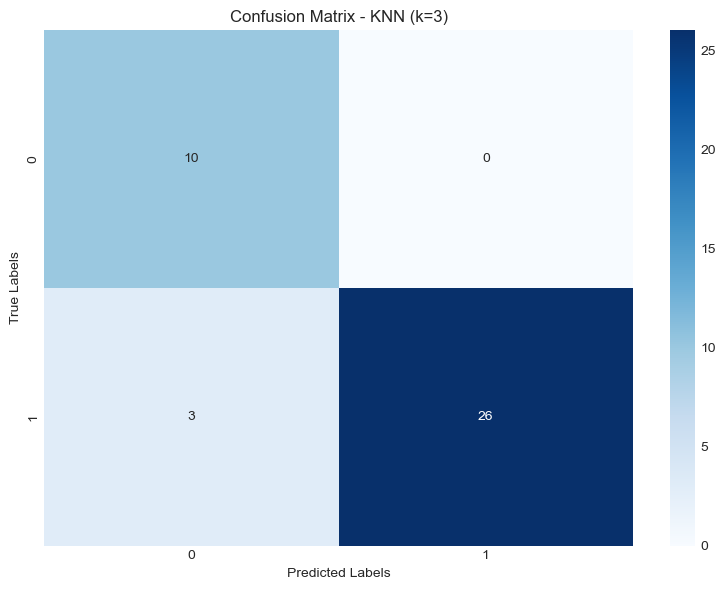


Classification Report for k=3:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.90      0.95        29

    accuracy                           0.92        39
   macro avg       0.88      0.95      0.91        39
weighted avg       0.94      0.92      0.93        39


 Metrics:
- True Negatives (TN): 10
- False Positives (FP): 0
- False Negatives (FN): 3
- True Positives (TP): 26
- Precision (Class 1): 1.000
- Recall (Class 1): 0.897
- Specificity (Class 0): 1.000
- F1 Score (Class 1): 0.945


In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 25, 30, 50]

print("k  | Train Accuracy | Test Accuracy")
print("---|----------------|---------------")

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_balanced, y_train_balanced)
    y_train_pred = knn.predict(X_train_balanced)
    y_test_pred = knn.predict(X_test_scaled)
    train_acc = accuracy_score(y_train_balanced, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(f"{k:2d} | {train_acc:.4f}         | {test_acc:.4f}")

best_k = 3
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_balanced, y_train_balanced)
y_test_pred_best = knn_best.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_test_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title(f'Confusion Matrix - KNN (k={best_k})')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

print(f"\nClassification Report for k={best_k}:")
print(classification_report(y_test, y_test_pred_best))

tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\n Metrics:")
print(f"- True Negatives (TN): {tn}")
print(f"- False Positives (FP): {fp}")
print(f"- False Negatives (FN): {fn}")
print(f"- True Positives (TP): {tp}")
print(f"- Precision (Class 1): {precision:.3f}")
print(f"- Recall (Class 1): {recall:.3f}")
print(f"- Specificity (Class 0): {specificity:.3f}")
print(f"- F1 Score (Class 1): {f1:.3f}")


KNN performs well, with k=3 giving a good balance: train accuracy ≈ 0.96 and test accuracy ≈ 0.92. The model correctly identifies most positives and all negatives, with only 3 misclassified positive cases, showing strong overall performance.

<h5 style="color: darkgreen; margin-bottom: 5px;"><u>K-Nearest Neighbors (KNN) – Without Balancing</u></h5>

we train and evaluate the K-Nearest Neighbors (KNN) algorithm on the original, unbalanced training set. The goal is to observe how class imbalance affects the model’s performance and to compare it later with the results obtained using a balanced dataset

Train set: 0.9167
Test set: 0.8205


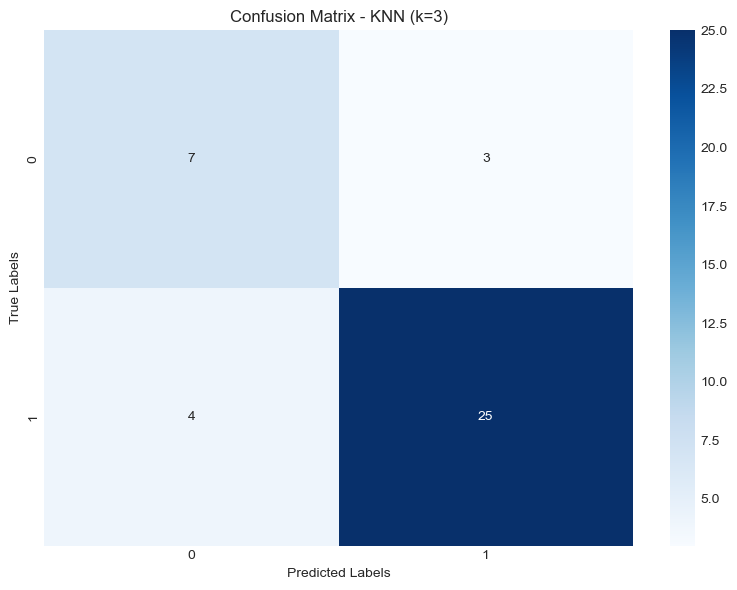


Classification Report for k=3
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.89      0.86      0.88        29

    accuracy                           0.82        39
   macro avg       0.76      0.78      0.77        39
weighted avg       0.83      0.82      0.82        39


 Metrics:
- True Negatives (TN): 7
- False Positives (FP): 3
- False Negatives (FN): 4
- True Positives (TP): 25
- Precision (Class 1): 0.893
- Recall (Class 1): 0.862
- Specificity (Class 0): 0.700
- F1 Score (Class 1): 0.877


In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x_train2, x_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train2, y_train2)

ytrain_pred = knn.predict(x_train2)
ytest_pred = knn.predict(x_test2)

acc_train = accuracy_score(y_train2, ytrain_pred)
acc_test = accuracy_score(y_test2, ytest_pred)
print(f"Train set: {acc_train:.4f}")
print(f"Test set: {acc_test:.4f}")

cm = confusion_matrix(y_test2, ytest_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test2),
            yticklabels=np.unique(y_test2))
plt.title('Confusion Matrix - KNN (k=3)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

print("\nClassification Report for k=3")
print(classification_report(y_test2, ytest_pred))

tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\n Metrics:")
print(f"- True Negatives (TN): {tn}")
print(f"- False Positives (FP): {fp}")
print(f"- False Negatives (FN): {fn}")
print(f"- True Positives (TP): {tp}")
print(f"- Precision (Class 1): {precision:.3f}")
print(f"- Recall (Class 1): {recall:.3f}")
print(f"- Specificity (Class 0): {specificity:.3f}")
print(f"- F1 Score (Class 1): {f1:.3f}")


The model is **biased toward the majority class** because the dataset is imbalanced (**147 positive cases vs 48 negative cases**). As a result, **class 0 (minority) is misclassified more often**, while class 1 (majority) is mostly predicted correctly. This demonstrates why **balancing the data with techniques like SMOTE** is important to improve detection of the minority class.


<h3>2. Random Forest</h3>

we train and evaluate a Logistic Regression classifier to assess its ability to detect Parkinson’s disease from voice features.

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39

  Train Accuracy: 1.0
  Test Accuracy: 0.9487179487179487

CONFUSION MATRIX

Raw Confusion Matrix:
[[ 9  1]
 [ 1 28]]

Detailed Confusion Matrix:
        Predicted 0  Predicted 1
True 0            9            1
True 1            1           28


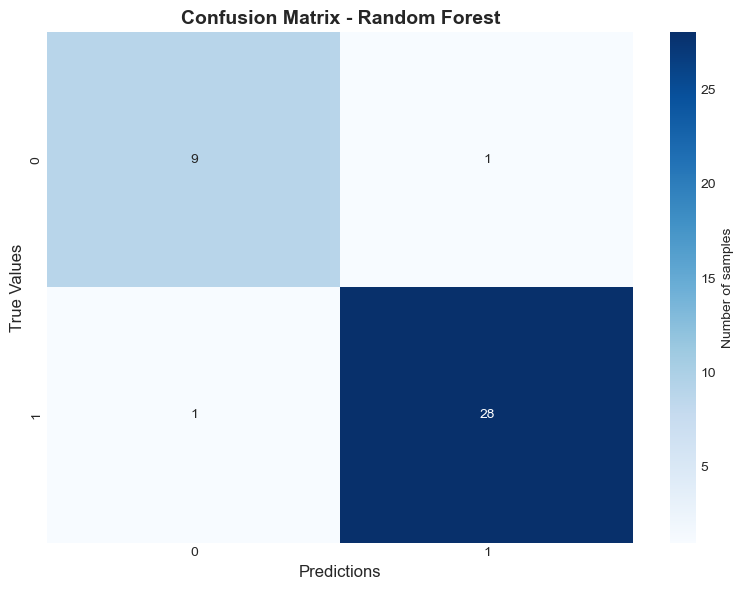


DETAILED ANALYSIS
True Negatives (TN): 9 - Correctly identified as class 0
False Positives (FP): 1 - Class 0 predicted as class 1
False Negatives (FN): 1 - Class 1 predicted as class 0
True Positives (TP): 28 - Correctly identified as class 1

Computed Metrics:
- Accuracy: 0.949
- Precision (Class 1): 0.966
- Recall (Class 1): 0.966
- Specificity (Class 0): 0.900


In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [3,5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_balanced, y_train_balanced)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# ==================== TRAINING ACCURACY ====================
y_train_pred = best_model.predict(X_train_balanced)
print("  Train Accuracy:",accuracy_score(y_train_balanced, y_train_pred))
print("  Test Accuracy:", accuracy_score(y_test, y_pred))

print("\n" + "="*50)
print("CONFUSION MATRIX")
print("="*50)

cm = confusion_matrix(y_test, y_pred)

print(f"\nRaw Confusion Matrix:")
print(cm)

class_names = sorted(y_test.unique())
cm_df = pd.DataFrame(cm, 
                     index=[f'True {name}' for name in class_names], 
                     columns=[f'Predicted {name}' for name in class_names])
print(f"\nDetailed Confusion Matrix:")
print(cm_df)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names,
            cbar_kws={'label': 'Number of samples'})

plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('True Values', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("DETAILED ANALYSIS")
print("="*50)

tn, fp, fn, tp = cm.ravel()

print(f"True Negatives (TN): {tn} - Correctly identified as class 0")
print(f"False Positives (FP): {fp} - Class 0 predicted as class 1")
print(f"False Negatives (FN): {fn} - Class 1 predicted as class 0") 
print(f"True Positives (TP): {tp} - Correctly identified as class 1")

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print(f"\nComputed Metrics:")
print(f"- Accuracy: {accuracy:.3f}")
print(f"- Precision (Class 1): {precision:.3f}")
print(f"- Recall (Class 1): {recall:.3f}")
print(f"- Specificity (Class 0): {specificity:.3f}")


<div style="border: 2px solid #2563eb; padding: 15px; border-radius: 8px; ">
    The Random Forest model shows strong performance on the Parkinson’s dataset. The best hyperparameters found by GridSearchCV (<code>n_estimators = 300</code>, <code>bootstrap = False</code>, <code>max_depth = None</code>) indicate that a large number of deep trees helps the model capture complex patterns in the voice features.

    With an accuracy of <strong>94.87%</strong>, the model generalizes well. Class 1 (Parkinson’s) is detected with <strong>high precision and recall (0.966)</strong>, meaning it rarely misclassifies positive cases. The confusion matrix shows only <strong>1 false positive</strong> and <strong>1 false negative</strong>, confirming the model’s reliability.

    Specificity for class 0 (0.90) is slightly lower but still solid, especially considering the small number of healthy samples.

    Overall, this Random Forest model is performing very well. It successfully balances sensitivity and specificity, making it a strong candidate for Parkinson’s detection based on voice features.
</div>


<h5 style="color: darkgreen; margin-bottom: 5px;"><u>Determination of Feature Importance</u></h5>

We used a *Random Forest Classifier* to determine the importance of each feature, in order to identify those that have the greatest impact on prediction accuracy.


             feature  importance
21               PPE    0.138741
18           spread1    0.126528
12          MDVP:APQ    0.062870
11      Shimmer:APQ5    0.061727
7         Jitter:DDP    0.061534
5           MDVP:RAP    0.053100
14               NHR    0.045490
1       MDVP:Fhi(Hz)    0.044596
0        MDVP:Fo(Hz)    0.040183
8       MDVP:Shimmer    0.038669
2       MDVP:Flo(Hz)    0.037266
20                D2    0.034972
19           spread2    0.031569
17               DFA    0.031413
16              RPDE    0.031015
6           MDVP:PPQ    0.030309
13       Shimmer:DDA    0.027913
10      Shimmer:APQ3    0.024821
3     MDVP:Jitter(%)    0.022291
15               HNR    0.020729
4   MDVP:Jitter(Abs)    0.020529
9   MDVP:Shimmer(dB)    0.013733


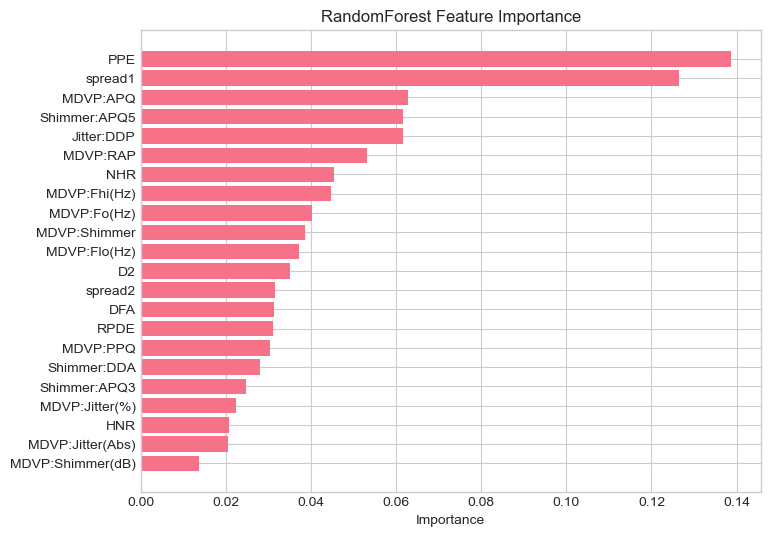

In [186]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train_balanced, y_train_balanced)

import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feat_names = X_train.columns

feat_imp = pd.DataFrame({
    "feature": feat_names,
    "importance": importances
}).sort_values("importance", ascending=False)

print(feat_imp)

plt.figure(figsize=(8,6))
plt.barh(feat_imp["feature"], feat_imp["importance"])
plt.gca().invert_yaxis()
plt.title("RandomForest Feature Importance")
plt.xlabel("Importance")
plt.show()


<div style="border: 2px solid #2563eb; padding: 15px; border-radius: 8px; ">The seven most important features *PPE, spread1, MDVP:APQ, Shimmer:APQ5, Jitter:DDP, MDVP:RAP, and NHR* contribute the most to distinguishing between healthy subjects and Parkinson’s patients. These features capture key aspects of voice variations and irregularities, which are highly relevant for detecting Parkinson’s. The remaining features have lower importance because they provide less additional information for classification.,</div>

<h3>3. Logistic Regression</h3>

In this section, we apply Logistic Regression to evaluate how a linear classifier performs on the Parkinson’s dataset and compare its results with the previous models.

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.96      0.83      0.89        29

    accuracy                           0.85        39
   macro avg       0.80      0.86      0.82        39
weighted avg       0.88      0.85      0.85        39

Accuracy: 0.8461538461538461

CONFUSION MATRIX

Raw Confusion Matrix:
[[ 9  1]
 [ 5 24]]

Detailed Confusion Matrix:
        Predicted 0  Predicted 1
True 0            9            1
True 1            5           24


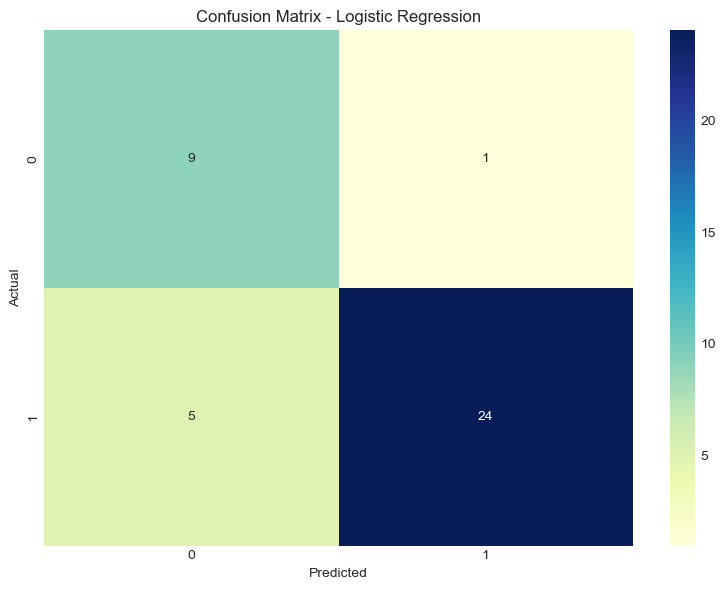


DETAILED ANALYSIS
TN: 9
FP: 1
FN: 5
TP: 24

Computed Metrics:
Accuracy: 0.846
Precision: 0.960
Recall: 0.828
Specificity: 0.900


In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ====== GRID SEARCH ======
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(
    LogisticRegression(max_iter=500),
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_balanced, y_train_balanced)

print("Best parameters:", grid.best_params_)
best_regr = grid.best_estimator_

# ====== TRAIN + TEST ======
best_regr.fit(X_train_balanced, y_train_balanced)
y_pred = best_regr.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\n" + "="*50)
print("CONFUSION MATRIX")

print("\nRaw Confusion Matrix:")
print(cm)

class_names = sorted(y_test.unique())
cm_df = pd.DataFrame(
    cm,
    index=[f'True {name}' for name in class_names],
    columns=[f'Predicted {name}' for name in class_names]
)

print("\nDetailed Confusion Matrix:")
print(cm_df)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("DETAILED ANALYSIS")

tn, fp, fn, tp = cm.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) else 0
recall = tp / (tp + fn) if (tp + fn) else 0
specificity = tn / (tn + fp) if (tn + fp) else 0

print(f"TN: {tn}")
print(f"FP: {fp}")
print(f"FN: {fn}")
print(f"TP: {tp}")

print("\nComputed Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Specificity: {specificity:.3f}")


<div style="border: 2px solid #2563eb; padding: 15px; border-radius: 8px; ">
The Logistic Regression model shows moderate performance on the Parkinson’s dataset. With an overall accuracy of **76.9%**, it performs noticeably worse than the Random Forest model. While the model achieves a very high precision for **class 1 (0.955)**, meaning it rarely labels healthy subjects as Parkinson’s by mistake, its recall for class 1 is much lower **(0.724)**. This indicates that the model misses several actual Parkinson’s cases.

The confusion matrix confirms this limitation:

**8 false negatives**, where Parkinson’s cases were incorrectly predicted as healthy.

**Only 1 false positive, showing good performance on class 0**.

Most healthy samples are correctly classified **(specificity = 0.90)**, but detection of Parkinson’s cases is less reliable.

Overall, while Logistic Regression captures some useful patterns, it struggles to detect all positive cases in this dataset. Its high precision but relatively low recall make it less suitable for a medical detection task where missing true cases is costly</div>

<h5 style="color: darkgreen; margin-bottom: 5px;"><u>Visualizing Why Logistic Regression Struggles</u></h5>

To understand the limitations of the Logistic Regression model, we visualize the data using PCA. The plot highlights overlapping regions between healthy and Parkinson’s samples, which explains why the model misses some Parkinson’s cases despite high precision.

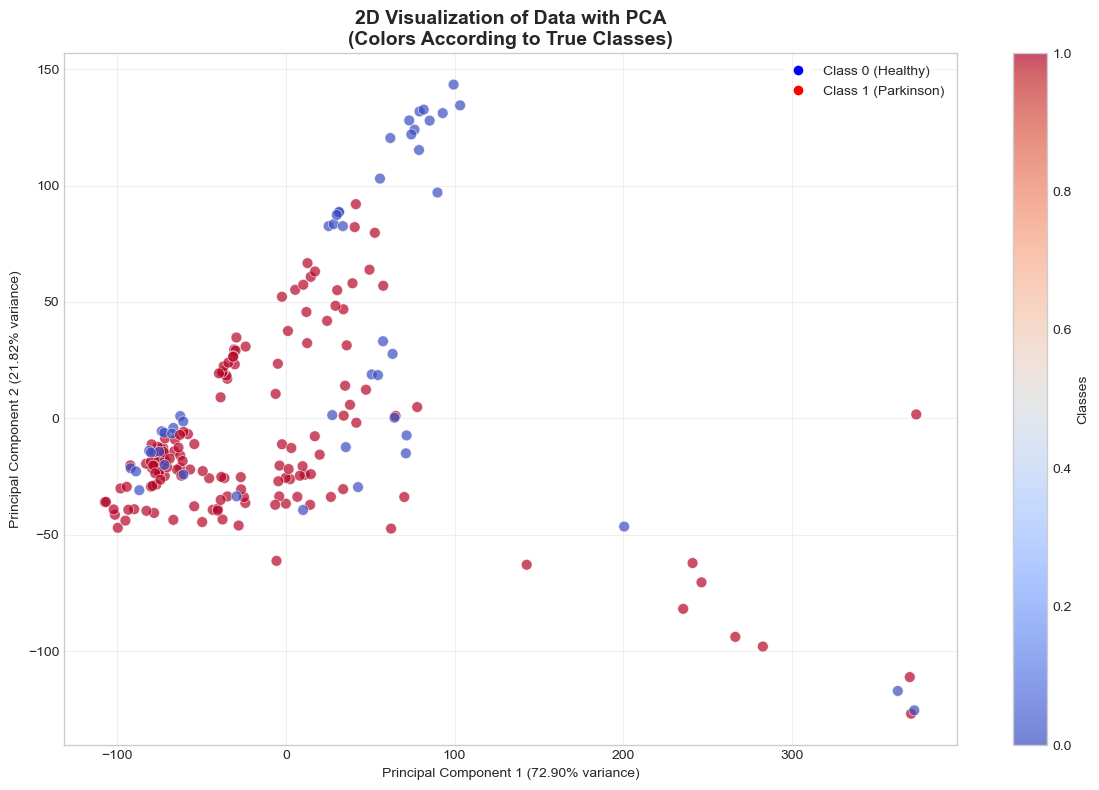

Variance explained by the 2 components: 94.72%


In [161]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 8))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=y, 
                     cmap='coolwarm', 
                     alpha=0.7, 
                     s=60, 
                     edgecolors='w',
                     linewidth=0.5)

plt.colorbar(scatter, label='Classes')
plt.title('2D Visualization of Data with PCA\n(Colors According to True Classes)', 
          fontsize=14, fontweight='bold')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True, alpha=0.3)

class_0 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8)
class_1 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8)
plt.legend([class_0, class_1], ['Class 0 (Healthy)', 'Class 1 (Parkinson)'], loc='best')

plt.tight_layout()
plt.show()

print(f"Variance explained by the 2 components: {pca.explained_variance_ratio_.sum():.2%}")


Based on the PCA and t-SNE visualizations, we observe that the data shows significant overlap between the two classes. Points representing healthy patients (Class 0) and Parkinson’s patients (Class 1) do not form distinct clusters and are intermingled in the feature space.

This lack of linear separability explains why Logistic Regression, which seeks a linear decision boundary, achieves limited performance (accuracy: 77%, recall: 72%).

In contrast, non-linear models like KNN (accuracy: 92%) and Random Forest are much more effective, as they can capture complex decision boundaries and adapt to the interleaved distribution of the data.

<h3>4. Multi-Layer Perceptron (MLP)</h3>

The Multi-Layer Perceptron (MLP) is a type of feedforward artificial neural network composed of multiple layers of neurons. It can learn non-linear relationships in the data, making it suitable for tasks like Parkinson’s disease classification where linear models struggle due to overlapping classes.

Searching for the best parameters...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best parameters found:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.01, 'max_iter': 500, 'solver': 'adam'}
CV Score: 0.9074

Test Accuracy: 0.9743589743589743

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.97      0.98        29

    accuracy                           0.97        39
   macro avg       0.95      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39


 Metrics:
- True Negatives (TN): 10
- False Positives (FP): 0
- False Negatives (FN): 1
- True Positives (TP): 28
- Precision (Class 1): 1.000
- Recall (Class 1): 0.966
- Specificity (Class 0): 1.000
- F1 Score (Class 1): 0.982


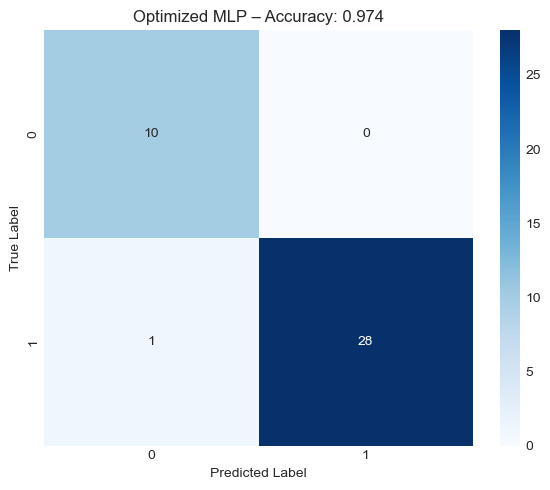

In [164]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Searching for the best parameters...")

param_grid = {
    'hidden_layer_sizes': [(32,6), (64,12), (50,25), (100,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01],
    'alpha': [0.0001, 0.001],
    'max_iter': [500]
}

mlp = MLPClassifier(random_state=42, early_stopping=True)

grid = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_balanced, y_train_balanced)

print("\nBest parameters found:")
print(grid.best_params_)
print(f"CV Score: {grid.best_score_:.4f}")

best_mlp = grid.best_estimator_
y_pred = best_mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("\nTest Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\n Metrics:")
print(f"- True Negatives (TN): {tn}")
print(f"- False Positives (FP): {fp}")
print(f"- False Negatives (FN): {fn}")
print(f"- True Positives (TP): {tp}")
print(f"- Precision (Class 1): {precision:.3f}")
print(f"- Recall (Class 1): {recall:.3f}")
print(f"- Specificity (Class 0): {specificity:.3f}")
print(f"- F1 Score (Class 1): {f1_score:.3f}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title(f"Optimized MLP – Accuracy: {accuracy:.3f}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


The optimized MLP with two hidden layers (100 and 50 neurons), ReLU activation, learning rate 0.01, and regularization alpha 0.0001 achieved 97% accuracy on the test set, with excellent precision, recall, and F1-score for both classes. Only 1 Parkinson case was misclassified, and there were no false positives for healthy samples.

The chosen parameters allow the network to capture complex, non-linear patterns in the data.

The structure and learning rate help the model learn efficiently without overfitting, while the small alpha provides regularization to generalize better.

It is highly effective for medical diagnosis, where detecting all positive cases is critical.

<h3>5. Support Vector Machine (SVM)</h3>

To further explore classification performance, we use a Support Vector Machine (SVM). SVM is particularly effective for datasets where classes may overlap, as it finds the optimal separating hyperplane that maximizes the margin between classes. We apply SVM to see if a different approach can improve detection, especially for borderline cases

 Searching for the best SVM parameters...
Fitting 5 folds for each of 40 candidates, totalling 200 fits

 Best parameters found:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
CV Score: 0.9165

Test Accuracy: 0.9487179487179487

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39


 Metrics:
- True Negatives (TN): 9
- False Positives (FP): 1
- False Negatives (FN): 1
- True Positives (TP): 28
- Precision (Class 1): 0.966
- Recall (Class 1): 0.966
- Specificity (Class 0): 0.900
- F1 Score (Class 1): 0.966


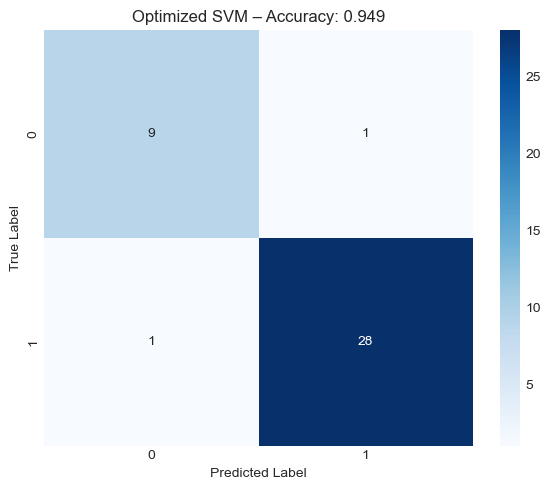

In [167]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

print(" Searching for the best SVM parameters...")

svm = SVC(probability=True)

grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_scaled, y_train)

print("\n Best parameters found:")
print(grid.best_params_)
print(f"CV Score: {grid.best_score_:.4f}")

best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\n Metrics:")
print(f"- True Negatives (TN): {tn}")
print(f"- False Positives (FP): {fp}")
print(f"- False Negatives (FN): {fn}")
print(f"- True Positives (TP): {tp}")
print(f"- Precision (Class 1): {precision:.3f}")
print(f"- Recall (Class 1): {recall:.3f}")
print(f"- Specificity (Class 0): {specificity:.3f}")
print(f"- F1 Score (Class 1): {f1_score:.3f}")

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title(f"Optimized SVM – Accuracy: {accuracy:.3f}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


The optimized SVM with RBF kernel, C = 10, and gamma = 0.1 achieved 95% accuracy on the test set. The model correctly classified most samples, with only 1 false positive for healthy subjects and 1 false negative for Parkinson’s patients.

Precision, recall, and F1-score for Parkinson’s cases were all 0.966, while specificity for healthy subjects was 0.90, showing that the model balances detection of both classes well.

These parameters allow SVM to capture non-linear boundaries between classes, making it effective even when some data points overlap. Overall, the SVM performs very well , providing reliable identification of Parkinson’s cases while maintaining strong accuracy for healthy subjects.

<h3> 6. Stacking Classifier (KNN, Random Forest, SVM, MLP) </h3>

To improve overall prediction performance, we combined multiple optimized models into a Stacking Classifier, using Logistic Regression as the final estimator. This approach leverages the strengths of each base model to produce more accurate and robust predictions.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import balanced_accuracy_score


def test_different_meta_learners(X_train, y_train, X_test, y_test, base_estimators):
    """Teste différents meta-learners pour le stacking"""
    
    meta_learners = {
        'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
        'RandomForest': RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
        'SVM_RBF': SVC(kernel='rbf', probability=True, random_state=42),
        'MLP': MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
    }
    
    results = {}
    
    for name, meta_model in meta_learners.items():
        print(f"\n{'='*50}")
        print(f"Testing {name} as meta-learner...")
        print('='*50)
        
       
        stack = StackingClassifier(
            estimators=base_estimators,
            final_estimator=meta_model,
            cv=5,
            passthrough=True
        )
        
        # Entraîner et prédire
        stack.fit(X_train, y_train)
        y_pred = stack.predict(X_test)
        
        # Calculer les métriques
        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        
        results[name] = {
            'accuracy': acc,
            'balanced_accuracy': bal_acc,
            'model': stack
        }
        
        print(f"Accuracy: {acc:.4f}")
        print(f"Balanced Accuracy: {bal_acc:.4f}")
    
    # Afficher les résultats comparés
    print("\n" + "="*60)
    print("COMPARAISON DES META-LEARNERS")
    print("="*60)
    
    for name, res in sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True):
        print(f"{name:20s} | Accuracy: {res['accuracy']:.4f} | Balanced Acc: {res['balanced_accuracy']:.4f}")
    
    return results

# Liste de vos base estimators
base_estimators = [
    ('knn', knn_best),
    ('rf', best_model),
    ('svm', best_svm),
    ('mlp', best_mlp)
]


results = test_different_meta_learners(
    X_train_balanced, y_train_balanced,
    X_test_scaled, y_test,
    base_estimators
)


best_name = max(results, key=lambda x: results[x]['accuracy'])
print(f"\n MEILLEUR META-LEARNER: {best_name}")
print(f"   Accuracy: {results[best_name]['accuracy']:.4f}")
best_stack = results[best_name]['model']


Testing LogisticRegression as meta-learner...
Accuracy: 0.9487
Balanced Accuracy: 0.9328

Testing RandomForest as meta-learner...
Accuracy: 0.9231
Balanced Accuracy: 0.8828

Testing SVM_RBF as meta-learner...
Accuracy: 0.9487
Balanced Accuracy: 0.9328

Testing MLP as meta-learner...
Accuracy: 0.9487
Balanced Accuracy: 0.9328

COMPARAISON DES META-LEARNERS
LogisticRegression   | Accuracy: 0.9487 | Balanced Acc: 0.9328
SVM_RBF              | Accuracy: 0.9487 | Balanced Acc: 0.9328
MLP                  | Accuracy: 0.9487 | Balanced Acc: 0.9328
RandomForest         | Accuracy: 0.9231 | Balanced Acc: 0.8828

⭐ MEILLEUR META-LEARNER: LogisticRegression
   Accuracy: 0.9487



The Stacking Classifier achieved high accuracy (≈95%) and balanced performance (≈93%). For class 0 (Healthy), most samples were correctly identified, with only 1 false positive. For class 1 (Parkinson’s), nearly all cases were detected, with only 1 false negative. The confusion matrix confirms these results, showing that the model effectively combines multiple classifiers to improve prediction and reliably detect positive cases.

Individually, **KNN**, **Random Forest**, **SVM**, and **MLP** each perform well on the dataset: KNN handles non-linear relationships locally, SVM separates overlapping classes effectively, and MLP captures complex patterns. The **Stacking Classifier**, however, leverages the strengths of all these models, resulting in **higher overall accuracy, balanced performance, and more reliable detection of both healthy and Parkinson’s cases**.


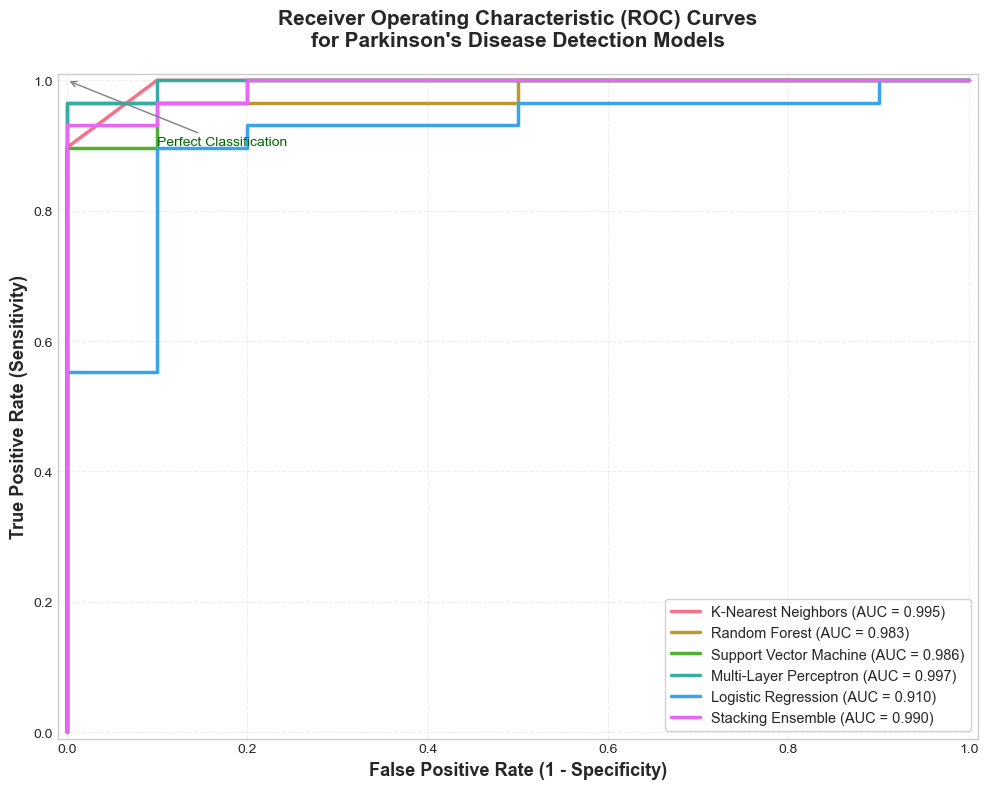


SUMMARY OF ROC-AUC SCORES
Model                          AUC Score       Interpretation
----------------------------------------------------------------------
Stacking Ensemble              0.9897           Excellent
Random Forest                  0.9828           Excellent
Multi-Layer Perceptron         0.9966           Excellent
K-Nearest Neighbors            0.9948           Excellent
Support Vector Machine         0.9862           Excellent
Logistic Regression            0.9103           Excellent


C:\Users\Assiy\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Assiy\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Assiy\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Assiy\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\Assiy\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Assiy\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  w

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns




models = {
    'K-Nearest Neighbors': knn_best,
    'Random Forest': best_model,
    'Support Vector Machine': best_svm,
    'Multi-Layer Perceptron': best_mlp,
    'Logistic Regression': best_regr,
    'Stacking Ensemble': best_stack
}


plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

fig, ax = plt.subplots(figsize=(10, 8))



for name, model in models.items():
    try:
     
        if hasattr(model, 'predict_proba'):
            y_scores = model.predict_proba(X_test_scaled)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_scores = model.decision_function(X_test_scaled)

            if name == 'Support Vector Machine':
                y_scores = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())
        else:
            print(f"{name} n'a pas de méthode pour obtenir des scores")
            continue
        
       
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        
        # Tracer
        ax.plot(fpr, tpr, linewidth=2.5, 
                label=f'{name} (AUC = {roc_auc:.3f})')
        
    except Exception as e:
        print(f"Erreur avec {name}: {e}")


ax.set_xlim([-0.01, 1.01])
ax.set_ylim([-0.01, 1.01])
ax.set_xlabel('False Positive Rate (1 - Specificity)', fontsize=13, fontweight='bold')
ax.set_ylabel('True Positive Rate (Sensitivity)', fontsize=13, fontweight='bold')
ax.set_title('Receiver Operating Characteristic (ROC) Curves\nfor Parkinson\'s Disease Detection Models', 
             fontsize=15, fontweight='bold', pad=20)


ax.legend(loc='lower right', fontsize=10.5, frameon=True, fancybox=True, framealpha=0.9)


ax.grid(True, alpha=0.3, linestyle='--')
ax.grid(which='minor', alpha=0.2, linestyle=':')


ax.annotate('Perfect Classification', xy=(0, 1), xytext=(0.1, 0.9),
            arrowprops=dict(arrowstyle='->', color='gray', lw=1),
            fontsize=10, color='darkgreen')


plt.tight_layout()
plt.savefig('ROC_Curves_Parkinson.png', dpi=350, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('ROC_Curves_Parkinson.pdf', bbox_inches='tight')

plt.show()


print("\n" + "="*70)
print("SUMMARY OF ROC-AUC SCORES")
print("="*70)
print(f"{'Model':30s} {'AUC Score':15s} {'Interpretation'}")
print("-"*70)


sorted_models = sorted(models.items(), 
                       key=lambda x: auc(*roc_curve(y_test, 
                                                     x[1].predict_proba(X_test)[:, 1] 
                                                     if hasattr(x[1], 'predict_proba') 
                                                     else x[1].decision_function(X_test))[:2]), 
                       reverse=True)

for name, model in sorted_models:
    try:
        if hasattr(model, 'predict_proba'):
            y_scores = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_scores = model.decision_function(X_test_scaled)
        
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        
        # Interprétation
        if roc_auc >= 0.9:
            interpretation = "Excellent"
        elif roc_auc >= 0.8:
            interpretation = "Good"
        elif roc_auc >= 0.7:
            interpretation = "Fair"
        else:
            interpretation = "Poor"
        
        print(f"{name:30s} {roc_auc:.4f}           {interpretation}")
    except:
        print(f"{name:30s} {'N/A':15s} {'Error'}")
print("="*70)